<a href="https://colab.research.google.com/github/AshiniAnantharaman/RIT-DSCI-633-FDS/blob/main/Assignments/DSCI633_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practise Work - Not Graded**

*Attribution: These exercises are a curated version of assignments from "Hands-on Machine Learning using Scikit-Learn, Keras and TensorFlow by Aurélien Geron". To learn the concepts taught in class (until lecture 4 only), you will work on various tasks. The first one is to predict median house values in Californian districts, given a number of features from these districts.*

** You may be tempted to look up the code on the Internet. It's upto you to do that and decide how much your really want to learn."

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [166]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [167]:
# Where to save the figures for this lecture(s) only. The first few variables will use functions from OS module that you just imported.
# You will also create folders where the files from various plots will be saved.

# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "Lecture_2_3"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Data was given in a zip file and uploaded to Google colab.

In [168]:
# Read a comma-separated values (csv) file into Pandas DataFrame. Read more documentation on Pandas on https://pandas.pydata.org/docs/index.html

import pandas as pd

def load_data(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

In [169]:
titanic = load_data("/content/train.csv")
titanic.head() #reads only 5 rows in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
# Test data
titanic_test = load_data("/content/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
# Combining the test and train dataset to 
df = pd.concat([titanic, titanic_test])

In [172]:
# Execrise: Print a summary of the DataFrame ()
len(df)

1309

In [173]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [174]:
# Exercise: Write code to plot a histogram for the following features, one at a time.

Saving figure attribute_histogram_plots


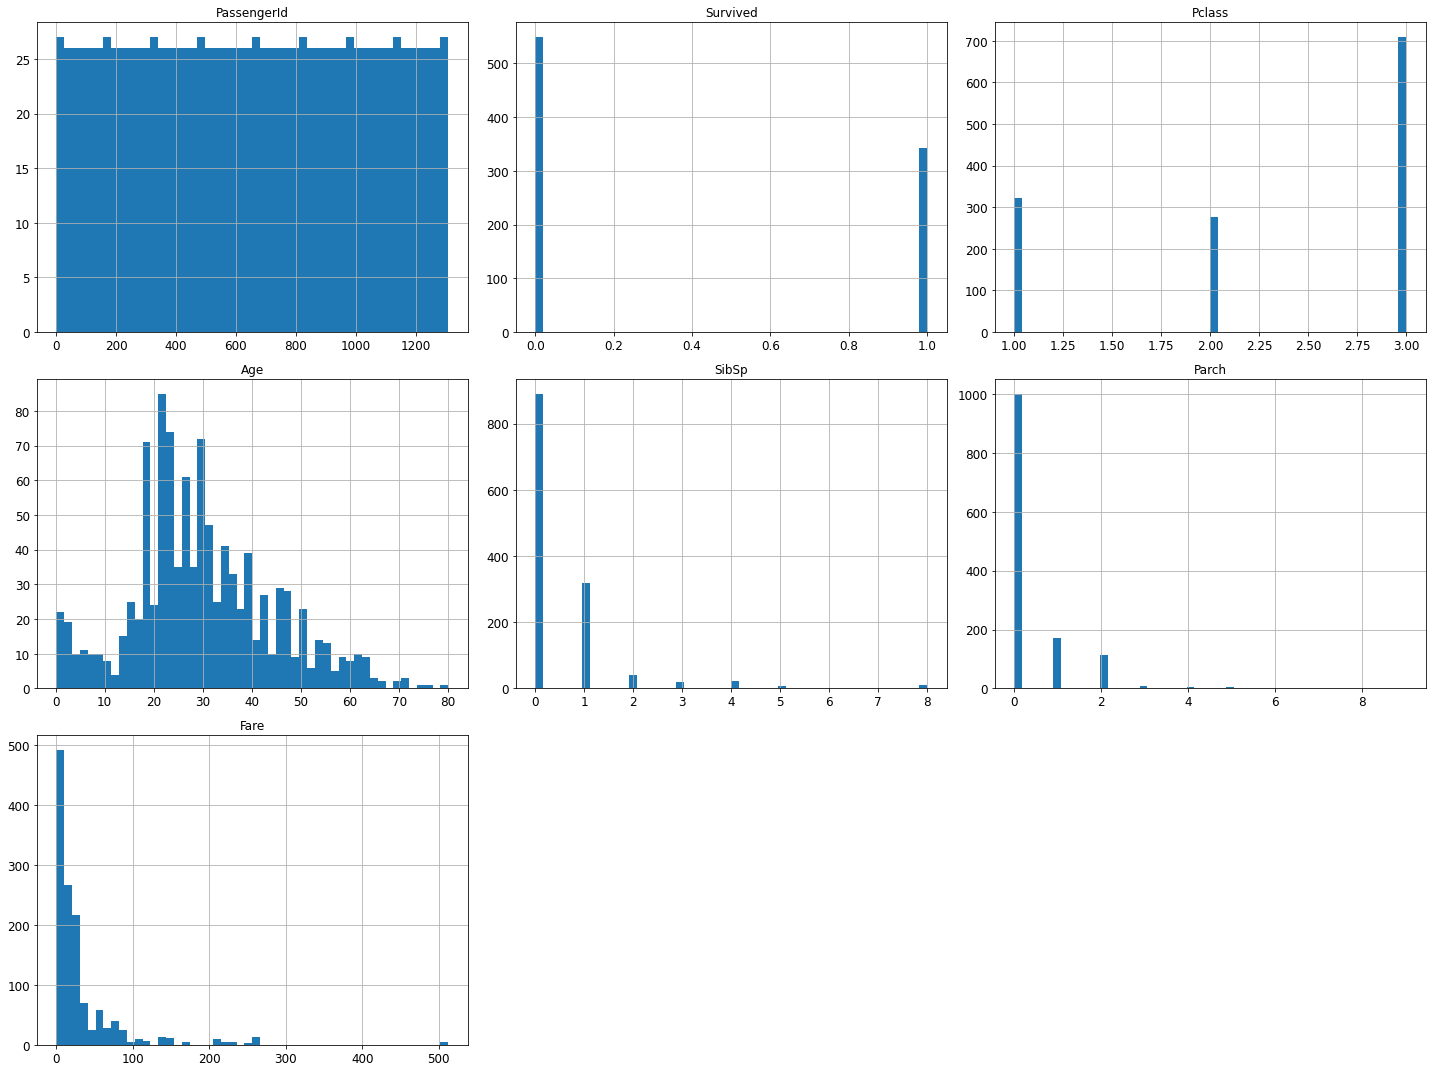

In [175]:
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [176]:
# to find the total number of blank values for each attribute in the dataset
print (df.isnull().sum())


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [177]:
print(df.nunique())

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64


In [178]:
df2 = df[['Survived','PassengerId','Age','Pclass','Sex']].copy()

In [179]:
df2['Sex']=LabelEncoder().fit_transform(df2['Sex'])

In [180]:
df3=df2.dropna()

In [181]:
len(df3)
df3.head()

,Survived,PassengerId,Age,Pclass,Sex
0,0.0,1,22.0,3,1
1,1.0,2,38.0,1,0
2,1.0,3,26.0,3,0
3,1.0,4,35.0,1,0
4,0.0,5,35.0,3,1


In [182]:
df3=df3.astype(int)
print(df3.dtypes)


Survived       int64
PassengerId    int64
Age            int64
Pclass         int64
Sex            int64
dtype: object


In [183]:
df3

,Survived,PassengerId,Age,Pclass,Sex
0,0,1,22,3,1
1,1,2,38,1,0
2,1,3,26,3,0
3,1,4,35,1,0
4,0,5,35,3,1
...,...,...,...,...,...
885,0,886,39,3,0
886,0,887,27,2,1
887,1,888,19,1,0
889,1,890,26,1,1


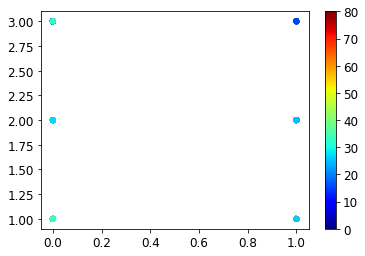

In [184]:
plot = plt.scatter(df3['Survived'],df3['Pclass'],c=df3['Age'], cmap="jet", lw=0)
plt.colorbar(plot)

In [185]:
# Using train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [186]:
# Exercise: Run the split_train_test()

In [187]:
# Check the size of Train by outputting the length of training and testing data
len(df2)

1309

In [188]:
len(train_set)

572

In [189]:
len(test_set)

142

In [190]:
# df2['Age_group'] = pd.cut(df2['Age'], bins=[0,15,30,45,60,75,90], labels=[15,30,45,60,75,90])

No handles with labels found to put in legend.


Saving figure housing_prices_scatterplot_simple


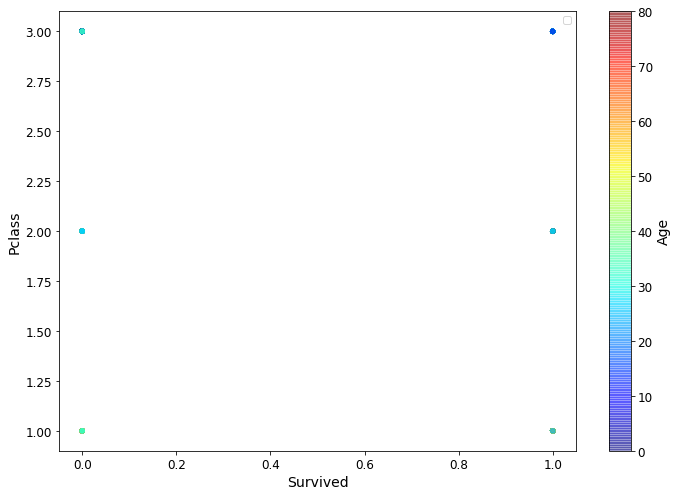

In [191]:
# A more detailed plot
df3.plot(kind="scatter", x='Survived', y="Pclass", c="Age", alpha=0.4,
             figsize=(10,7), cmap=plt.get_cmap("jet"),
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot_simple")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


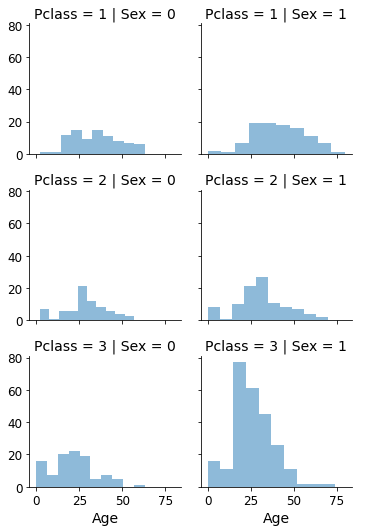

In [192]:
hist_plot = sns.FacetGrid(df3, 'Pclass', 'Sex', size = 2.5)
hist_plot.map(plt.hist,'Age', alpha=.5, bins=10)
hist_plot.add_legend()

In [193]:
# delete
train_set, test_set = split_train_test(df3, 0.2)

In [194]:
X_train = train_set.drop('Survived', axis=1)
Y_train = train_set['Survived']
X_test = test_set.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((572, 4), (572,), (142, 4))

In [195]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
dt = classifier.score(X_train, Y_train)

dt



# classifier = DecisionTreeClassifier()
# classifier.fit(X_train, Y_train)
# Y_pred = classifier.predict(X_test)
# dt = classifier.score(X_train, Y_train)

# dt


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7097902097902098